In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/codes/G-ZZ_clean/jl_files/zz_samplers.jl")
include("temp.jl")

run_sampler (generic function with 4 methods)

In [2]:
X, y = load("shrinkage_data_3.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr);

### HMC:

### Tune HMC:

In [3]:
ξ0 = randn(d)
Total_time = 10
T = 250
Metropolise = false
Print = false
n_leapfrog_list = 20*(1:5)
prior = SS_prior(d, σ02);

In [7]:
xi_samples_hmc, hyper_samples_hmc, acc = 
zeros(d,T+1,length(n_leapfrog_list)), zeros(hyperparam_size(prior),T+1,length(n_leapfrog_list)), 
zeros(length(n_leapfrog_list));

In [8]:
for (i,n_leapfrog) in enumerate(reverse(n_leapfrog_list))
    start = time()
    prior = SS_prior(d, σ02)
    my_ll = ll_logistic_sp(X,y)
    my_model = model(my_ll, prior)
    stepsize = Total_time/n_leapfrog
    xi_samples_hmc[:,:,i], hyper_samples_hmc[:,:,i], acc[i] = 
    GibbsHMC(my_model, ξ0, stepsize, n_leapfrog, T, Metropolise, Print)
    print("n_leapfrog = ", n_leapfrog, " in ", round((time()-start)/60,2), " mins \n")
end

HMC acceptance = 100.0 percent; n_leapfrog = 100 in 16.38 mins 
HMC acceptance = 100.0 percent; n_leapfrog = 80 in 12.54 mins 
HMC acceptance = 100.0 percent; n_leapfrog = 60 in 8.86 mins 


LoadError: [91mArgumentError: InverseGamma: the condition α > zero(α) && θ > zero(θ) is not satisfied.[39m

In [9]:
Metropolise = true 
Print = false

stepsize = Total_time/50
total_times = 3*stepsize*(5:15)
n_leapfrog_steps = 5*(1:10)

for total_time in total_times
    print("Total time = ", round(total_time,2), "\n")
    for n_leapfrog in n_leapfrog_steps
        start = time()
        prior = SS_prior(d, σ02)
        my_ll = ll_logistic_sp(X,y)
        my_model = model(my_ll, prior)
        a, b, c = 
        GibbsHMC(my_model, ξ0, total_time/n_leapfrog, n_leapfrog, 500, Metropolise, Print)
        print("n_leapfrog = ", n_leapfrog, " in ", round((time()-start)/60,2), " mins \n")
    end
end

Total time = 3.0
HMC acceptance = 0.0 percent; n_leapfrog = 5 in 1.67 mins 
HMC acceptance = 1.0 percent; n_leapfrog = 10 in 3.02 mins 
HMC acceptance = 22.2 percent; n_leapfrog = 15 in 4.44 mins 
HMC acceptance = 52.2 percent; n_leapfrog = 20 in 7.0 mins 
HMC acceptance = 69.0 percent; n_leapfrog = 25 in 8.35 mins 
HMC acceptance = 78.6 percent; n_leapfrog = 30 in 9.59 mins 
HMC acceptance = 86.8 percent; n_leapfrog = 35 in 10.62 mins 
HMC acceptance = 85.8 percent; n_leapfrog = 40 in 11.59 mins 
HMC acceptance = 90.0 percent; n_leapfrog = 45 in 12.15 mins 
HMC acceptance = 92.8 percent; n_leapfrog = 50 in 13.08 mins 
Total time = 3.6
HMC acceptance = 0.0 percent; n_leapfrog = 5 in 1.49 mins 
HMC acceptance = 0.2 percent; n_leapfrog = 10 in 2.71 mins 
HMC acceptance = 7.6 percent; n_leapfrog = 15 in 3.92 mins 
HMC acceptance = 34.8 percent; n_leapfrog = 20 in 5.22 mins 
HMC acceptance = 60.6 percent; n_leapfrog = 25 in 6.33 mins 
HMC acceptance = 63.4 percent; n_leapfrog = 30 in 7.37 

In [4]:
ξ0 = randn(d)
total_times_optimal = [3.0, 3.6, 4.2, 4.8, 5.4, 6.0, 6.6]
n_leapfrog_optimal =  [25 , 30 , 35 , 38 , 40 , 48 , 52 ]
T = 5000
Metropolise = true
Print = false

for (i,total_time) in enumerate(total_times_optimal) 
    start = time()
    prior = SS_prior(d, σ02)
    my_ll = ll_logistic_sp(X,y)
    my_model = model(my_ll, prior)
    xi_samples_hmc, hyper_samples_hmc, acc =
    GibbsHMC(my_model, ξ0, total_time/n_leapfrog_optimal[i], n_leapfrog_optimal[i], T, Metropolise, Print)
    print("n_leapfrog = ", n_leapfrog_optimal[i], " in ", round((time()-start)/60,2), " mins \n")
    filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/GibbsHMC:d:"*string(d)*"-Nobs:"*string(Nobs)*
                "-total_time:"*string(total_time)*"-n_leapfrog:"*string(n_leapfrog_optimal[i])*".jld"
    save(filename, "xi_samples", xi_samples_hmc, "hyper_samples", hyper_samples_hmc, "acc", acc)
    xi_samples_hmc, hyper_samples_hmc, acc = [], [], []
    gc()
end

HMC acceptance = 68.8 percent; n_leapfrog = 25 in 34.54 mins 
HMC acceptance = 65.74 percent; n_leapfrog = 30 in 41.11 mins 
HMC acceptance = 65.8 percent; n_leapfrog = 35 in 47.64 mins 
HMC acceptance = 64.02 percent; n_leapfrog = 38 in 51.58 mins 
HMC acceptance = 57.92 percent; n_leapfrog = 40 in 54.27 mins 
HMC acceptance = 63.6 percent; n_leapfrog = 48 in 64.85 mins 
HMC acceptance = 62.96 percent; n_leapfrog = 52 in 70.26 mins 


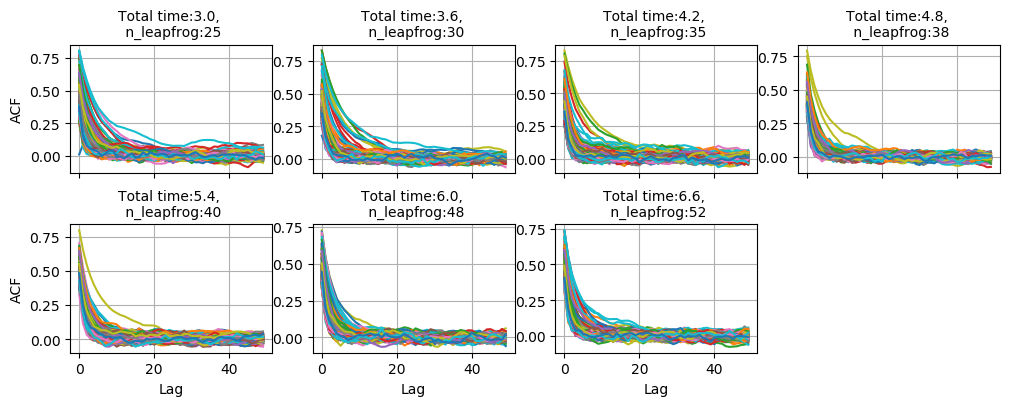

In [19]:
maxlag_hmc = 50
fig = figure(figsize=(12,4))
acfs_hmc = zeros(length(total_times_optimal),d,maxlag_hmc)

for i in 1:2 
    for j in 1:4
        k = 4*(i-1)+j
        if k < 8
            total_time, n_leapfrog = total_times_optimal[k], n_leapfrog_optimal[k]
            filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/GibbsHMC:d:"*
                        string(d)*"-Nobs:"*string(Nobs)*
                        "-total_time:"*string(total_time)*"-n_leapfrog:"*string(n_leapfrog)*".jld"
            xi_samples_hmc = load(filename, "xi_samples")

            subplot(2,4,k)
            for dim in 1:size(xi_samples_hmc,1) 
                a = acf(xi_samples_hmc[dim,:], maxlag_hmc)
                plot(a)
                acfs_hmc[k,dim,:] = a
            end
            grid(true)  
            title("Total time:"*string(total_time)*", \n n_leapfrog:"*string(n_leapfrog), fontsize=10)
            xi_samples_hmc = []
            gc()
            if i == 2 xlabel("Lag") end
            if i == 1 xticks(alpha=0) end
            if j == 1 ylabel("ACF") end
            subplots_adjust(hspace=0.4)
        end
    end
end

In [42]:
hmc_mixing

7×1×1 Array{Float64,3}:
[:, :, 1] =
  597.316
  621.326
  685.699
  934.831
  737.712
 1189.38 
  959.895

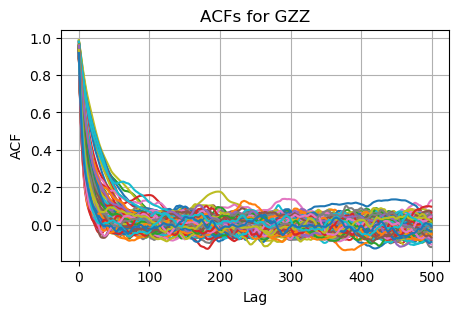

In [24]:
mb_size = 1
max_attempts = 1.5*10^7
lambda = 2e1

fig = figure("pyplot_barplot",figsize=(5,3))
n_samples = 10^4
maxlag_gzz = 500
acfs_gzz = zeros(d,maxlag_gzz)
discard = 0
filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*string(lambda)*
            "-d:"*string(d)*"-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
xi_samples_gzz = extract_samples(xt_skel[:,discard+1:end], 
                             bt_skel[:,discard+1:end], 
                            (bt_skel[end]-bt_skel[discard+1])/n_samples,
                            "linear")[:,1:end-1]
iacts_gzz = zeros(size(xi_samples_gzz,1))
for dim in 1:size(xi_samples_gzz,1)
    a = acf(xi_samples_gzz[dim,:],maxlag_gzz)
    plot(a)
    acfs_gzz[dim,:] = a
end
title("ACFs for GZZ")
xlabel("Lag")
ylabel("ACF")
grid(true)
xt_skel, bt_skel = [], []
gc()

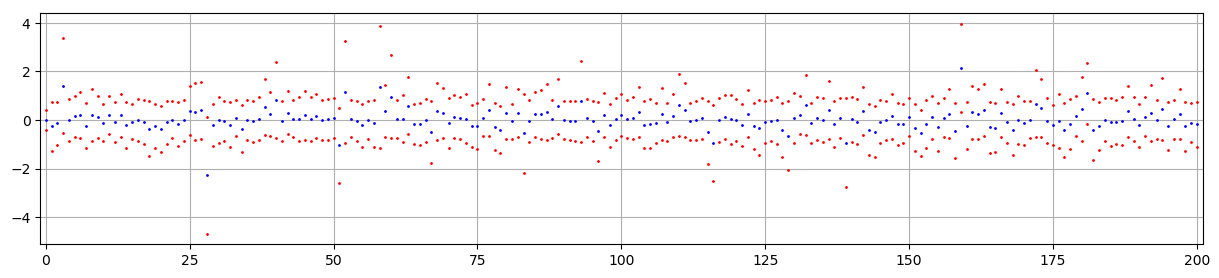

In [41]:
fig = figure("pyplot_barplot",figsize=(15,3))
plot(mean(xi_samples_gzz,2), "bo", markersize=1)
plot(mean(xi_samples_gzz,2)-3*std(xi_samples_gzz,2), "ro", markersize=1)
plot(mean(xi_samples_gzz,2)+3*std(xi_samples_gzz,2), "ro", markersize=1)
xlim(-1,d)
grid(true)

In [21]:
hmc_mixing = T./maximum(sum(acfs_hmc[:,:,1:40],3),2)
hmc_cost = T*n_leapfrog_optimal*Nobs;

In [22]:
gzz_mixing = n_samples/maximum(sum(acfs_gzz[:,1:200],2))
gzz_cost = max_attempts*mb_size;

In [23]:
(gzz_mixing/gzz_cost)./(hmc_mixing./hmc_cost)

7×1×1 Array{Float64,3}:
[:, :, 1] =
 1.80339
 2.08044
 2.19932
 1.75148
 2.33629
 1.73891
 2.33418